In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
main_df = pd.read_csv('C:\Hims\Misc\diabetes.csv')
main_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
main_df.shape

(768, 9)

In [106]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [107]:
main_df.rename(columns={ 'DiabetesPedigreeFunction': 'DPF'},inplace=True)

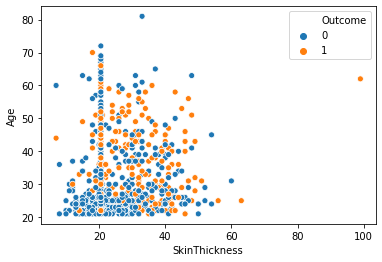

In [130]:
sns.scatterplot(data=main_df,x='SkinThickness',y='Age', hue='Outcome')

In [109]:
# Lots of zero values in the data

In [110]:
print('Glucose has zero counts : ' , main_df.Glucose.value_counts()[0])
print('BloodPressure has zero counts : ' , main_df.BloodPressure.value_counts()[0])
print('SkinThickness has zero counts : ' , main_df.SkinThickness.value_counts()[0])
print('Insulin has zero counts : ' , main_df.Insulin.value_counts()[0])
print('BMI has zero counts : ' , main_df.BMI.value_counts()[0])

Glucose has zero counts :  5
BloodPressure has zero counts :  35
SkinThickness has zero counts :  227
Insulin has zero counts :  374
BMI has zero counts :  11


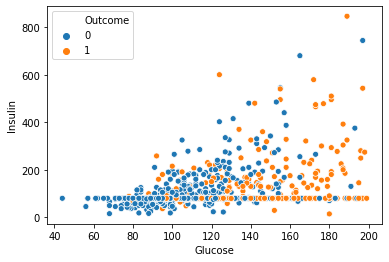

In [129]:
sns.scatterplot(data=main_df,x='Glucose',y='Insulin', hue='Outcome')

In [112]:
main_df['Glucose'].replace({ 0: main_df['Glucose'].mean()}, inplace=True)
main_df['BloodPressure'].replace({ 0: main_df['BloodPressure'].mean()}, inplace=True)
main_df['SkinThickness'].replace({ 0: main_df['SkinThickness'].mean()}, inplace=True)
main_df['Insulin'].replace({ 0: main_df['Insulin'].mean()}, inplace=True)
main_df['BMI'].replace({ 0: main_df['BMI'].mean()}, inplace=True)

In [113]:
corr = main_df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DPF,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


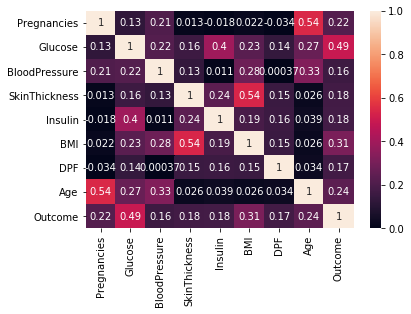

In [114]:
sns.heatmap(corr,vmin=0,vmax=1,annot=True)

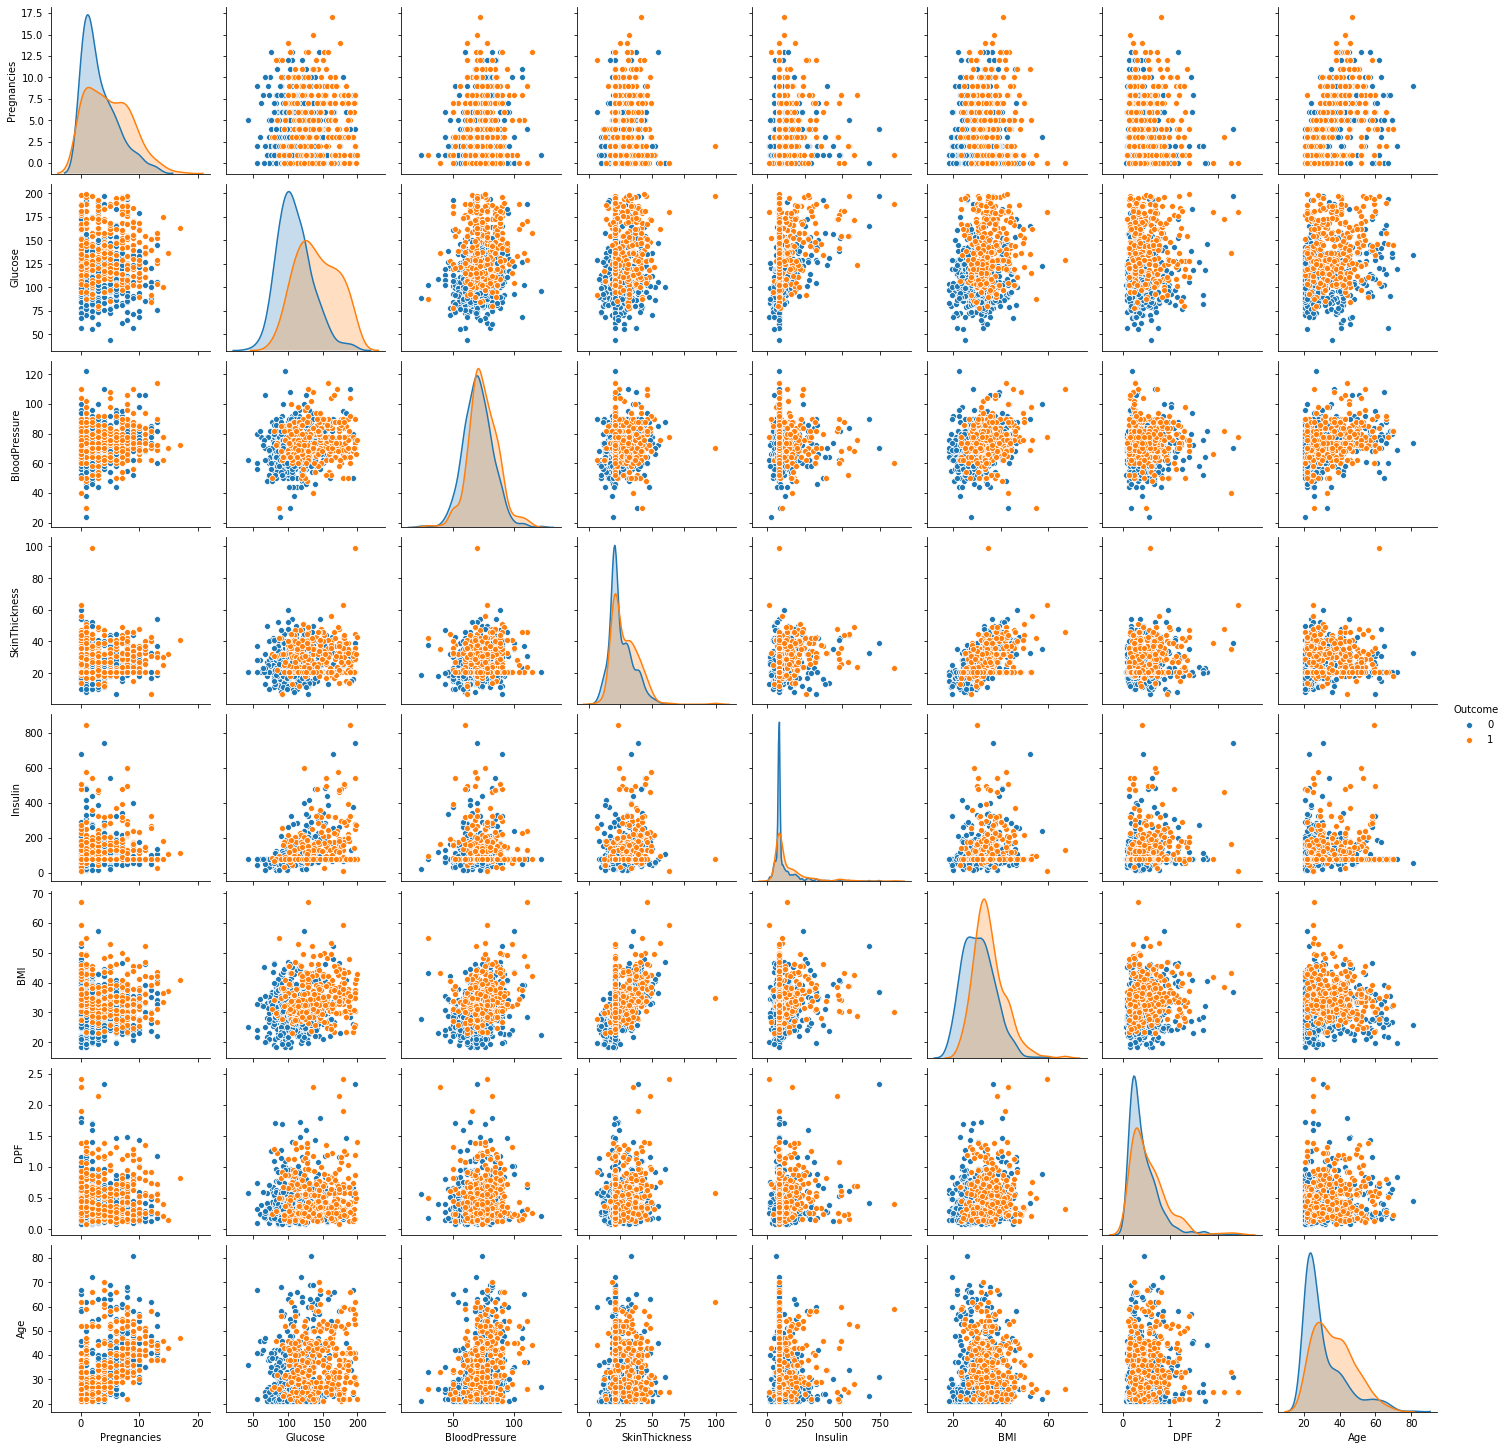

In [137]:
sns.pairplot(main_df, hue="Outcome")

In [115]:
X = main_df.iloc[:, :-1]
y = main_df.iloc[:, -1] 
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
steps=[('StdScaler', StandardScaler()),
       ('LR',LogisticRegression(solver='liblinear'))]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('StdScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [133]:
y_pred = pipeline.predict(X_test)

In [134]:
print(accuracy_score(y_test,y_pred))

0.7619047619047619


In [135]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[129,  25],
       [ 30,  47]], dtype=int64)

In [136]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       154
           1       0.65      0.61      0.63        77

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



In [141]:
from sklearn.neighbors import KNeighborsClassifier
steps=[('StdScaler', StandardScaler()),
       ('knn',KNeighborsClassifier())]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7272727272727273


In [142]:
from sklearn.svm import SVC
steps=[('StdScaler', StandardScaler()),
       ('svc',SVC())]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7445887445887446
